<a href="https://colab.research.google.com/github/Pratick9/Dog-vs-Cat-Classifier/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are 4 steps to create CNN model 
1. convolution - extract features from the input images
2. Max pooling - selecting of max number from feature map
3. Flatten     - making 2d array to 1d
4. Dense       - joining all the layers to a fully connected layer



In [ ]:
from keras.models import Sequential        #the Sequential module which is used for initializing our model.
from keras.layers import Convolution2D as c2d #we’ll use for the first step of making the CNN that is the convolution step in which we add convolutional layers.
from keras.layers import MaxPooling2D           #the pooling step that will add our pooling layers .
from keras.layers import Flatten                #flattening
from keras.layers import Dense                  #this is the package we use to add the fully connected layer.
import matplotlib.pyplot as plt


In [ ]:

classifier = Sequential()

Details about 1st step i.e convolutional 
1.   First arguments which we pass here feature detector , where 32 is feature detector 3,3 is the matrix size
2.   Next arguments are input shape, 64,64 means dimension of image 3 is the RGB
3.   relu - rectified linear unit , this will make all negative pixel value to 0 

In [ ]:
classifier.add(c2d(32,3,3,input_shape=(64,64,3),activation='relu'))

In [ ]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#adding one more convolutional layer
classifier.add(c2d(32,3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#flatten
classifier.add(Flatten())

In [ ]:
#Full connection
classifier.add(Dense(256, activation = 'relu'))    # hidden layer
classifier.add(Dense(128, activation = 'relu'))    
classifier.add(Dense(1, activation = 'sigmoid'))   # output Layer

Optimizer- The purpose of an optimizer is to adjust model weights to maximize a loss function.Adam is one of the kind

metrices-list of metrics to be evaluated by the model ,here accuracy

In [ ]:
#Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## ***Image Processing***

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
test_data = ImageDataGenerator(rescale=1./255)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Dataset/training_set/training_set',
                                              target_size=(64,64),
                                              batch_size=1,
                                              class_mode='binary')

Found 8005 images belonging to 2 classes.


In [ ]:
test_set = test_data.flow_from_directory('/content/drive/MyDrive/Dataset/test_set/test_set',
                                              target_size=(64, 64),
                                              batch_size=1,
                                              class_mode='binary')    

Found 2023 images belonging to 2 classes.


In [ ]:
print(len(train_set))
print(len(test_set))


8005
2023



Batch_size - It like small packet of dataset . if you give 10 it means your 8000 data will be divided in 800 packets so len will be 800.

In [ ]:
classifier.fit_generator(train_set,
                        epochs=10,
                        validation_data=test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
8005/8005 [==============================] - 72s 9ms/step - loss: 0.6943 - accuracy: 0.5059 - val_loss: 0.6926 - val_accuracy: 0.5002
Epoch 2/10
8005/8005 [==============================] - 70s 9ms/step - loss: 0.6932 - accuracy: 0.5096 - val_loss: 0.6896 - val_accuracy: 0.4998
Epoch 3/10
8005/8005 [==============================] - 75s 9ms/step - loss: 0.6899 - accuracy: 0.5330 - val_loss: 0.6887 - val_accuracy: 0.5472
Epoch 4/10
8005/8005 [==============================] - 72s 9ms/step - loss: 0.6890 - accuracy: 0.5315 - val_loss: 0.6870 - val_accuracy: 0.5363
Epoch 5/10
8005/8005 [==============================] - 70s 9ms/step - loss: 0.6801 - accuracy: 0.5758 - val_loss: 0.6697 - val_accuracy: 0.5882
Epoch 6/10
8005/8005 [==============================] - 71s 9ms/step - loss: 0.6750 - accuracy: 0.5821 - val_loss: 0.7035 - val_accuracy: 0.5788
Epoch 7/10
8005/8005 [==============================] - 68s 9ms/step - loss: 0.6699 - accuracy: 0.5928 - val_loss: 0.6906 - val_ac

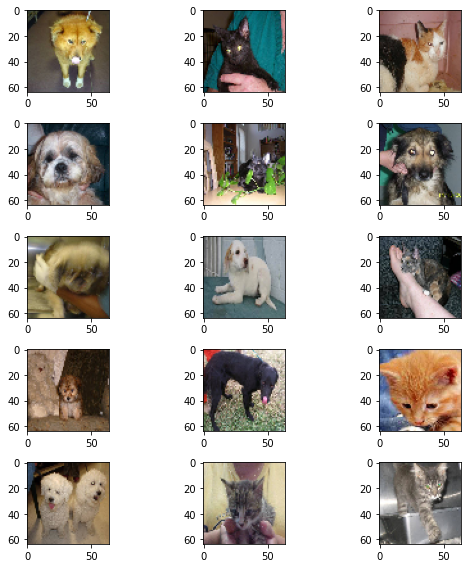

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for img in next(test_set):
        image = img[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()



# ***Predicting***



In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/Dataset/dog or cat - 1.jpg', target_size = (64, 64))

In [ ]:
# set the dimension
test_image = image.img_to_array(test_image)

In [ ]:
# set the dimension
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
# predict the correct image
result = classifier.predict(test_set)
print(result)

[[0.51952314]
 [0.5125519 ]
 [0.53810483]
 ...
 [0.6214244 ]
 [0.51820207]
 [0.507942  ]]


In [ ]:
# on the basis of training predict img
train_set.class_indices


{'cats': 0, 'dogs': 1}

In [ ]:
for i in result:
  if i == 1:
      prediction = 'dog'
      print('dog')
  else:
      prediction = 'cat'
      print('cat')

dog
dog
dog
dog
dog
cat
dog
dog
cat
cat
dog
dog
dog
dog
cat
dog
cat
dog
cat
dog
dog
dog
dog
dog
cat
cat
dog
dog
cat
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
cat
dog
dog
cat
dog
cat
dog
dog
dog
dog
cat
dog
cat
dog
dog
dog
dog
dog
dog
cat
dog
cat
cat
cat
dog
dog
dog
cat
cat
dog
dog
dog
dog
dog
dog
cat
dog
cat
dog
dog
dog
dog
dog
dog
dog
cat
cat
dog
dog
cat
cat
cat
dog
dog
dog
cat
dog
dog
dog
dog
cat
dog
cat
dog
cat
dog
dog
dog
dog
dog
dog
dog
cat
cat
dog
dog
cat
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
cat
dog
dog
cat
dog
cat
dog
dog
dog
dog
dog
dog
cat
dog
dog
cat
dog
dog
dog
dog
dog
cat
cat
dog
dog
dog
dog
dog
dog
dog
cat
dog
dog
cat
dog
cat
dog
cat
dog
dog
dog
dog
dog
dog
cat
cat
dog
cat
dog
cat
dog
dog
dog
dog
dog
dog
dog
cat
dog
dog
dog
cat
dog
dog
cat
dog
dog
dog
cat
dog
dog
cat
cat
dog
cat
dog
dog
dog
cat
dog
dog
dog
dog
dog
dog
cat
dog
dog
dog
dog
cat
dog
cat
cat
dog
cat
cat
dog
dog
cat
dog
dog
cat
cat
cat
dog
cat
dog
dog
dog
dog
dog
cat
dog
dog
dog
dog
dog
dog
dog
dog
dog
cat
dog


TypeError: ignored

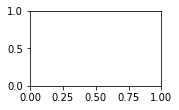

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for img in next(result):
        image = img[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
len(result)

2023

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_set,result))

ValueError: ignored